In [19]:
#Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Setting up Seaborn

In [36]:
large = 20; med = 16; small = 14
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (8, 8),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

# Load the Data

In [37]:
#Sample Pre-Cleaned Data
df = pd.read_csv('auto-mpg.csv')

In [38]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# Heatmap

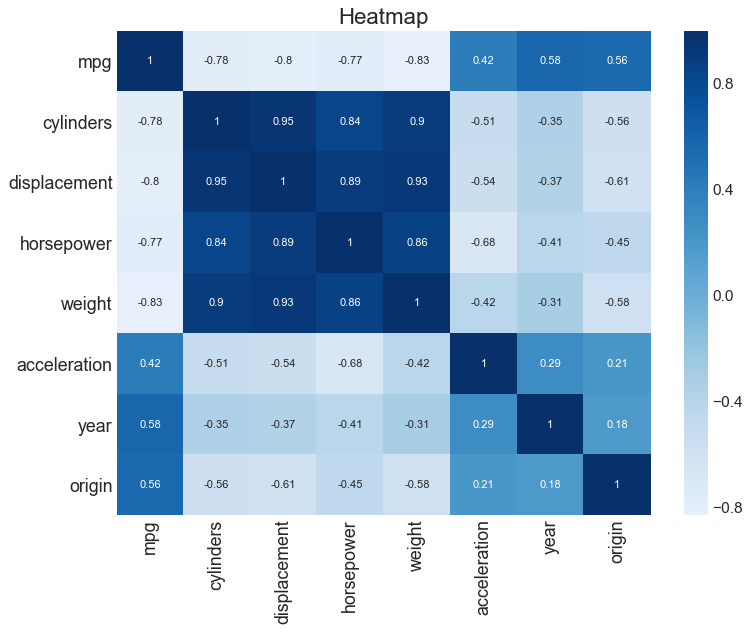

In [39]:
#code for plot
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='Blues', center=0, annot=True)

#title
plt.title('Heatmap', fontsize=large)
plt.xticks(fontsize=med)
plt.yticks(fontsize=med)
plt.tight_layout()
plt.show()

# Pairplot

<Figure size 640x640 with 0 Axes>

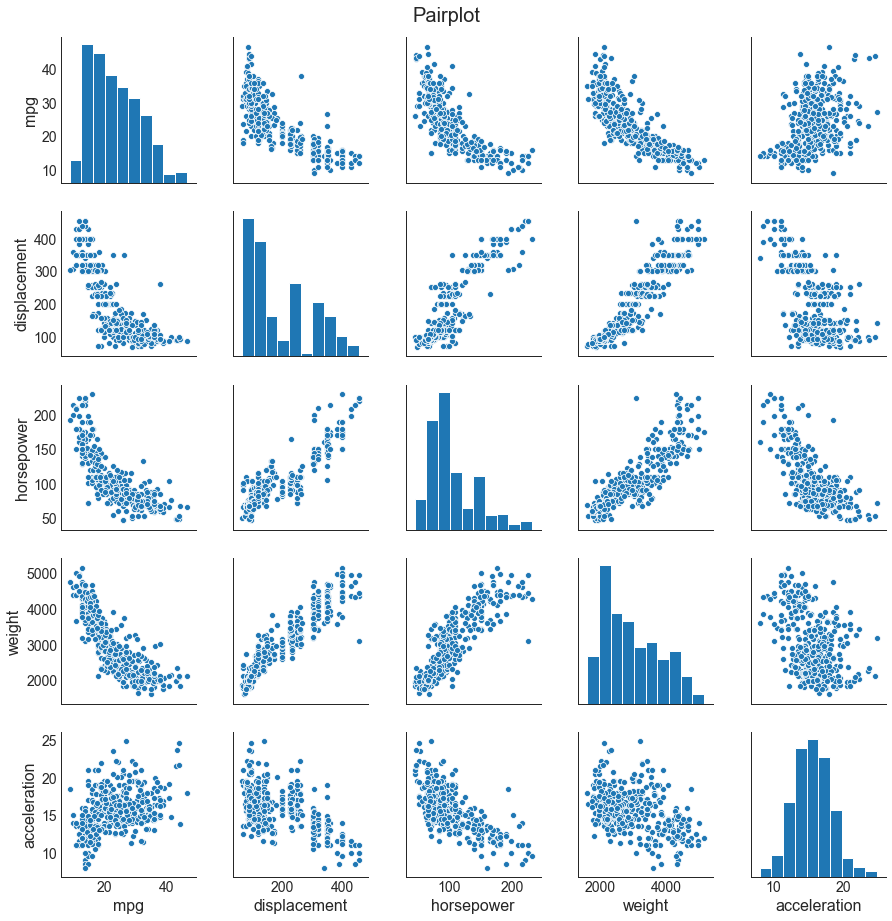

In [40]:
# Code for Plot
plt.figure(figsize=(8,8), dpi= 80)
sns.pairplot(df, vars=['mpg','displacement','horsepower','weight','acceleration']).fig.suptitle("Pairplot", y=1.02, fontsize= large) # y= some height>1

#customization
plt.tight_layout()
plt.show()

# LM Plot

C:\Users\Sameer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


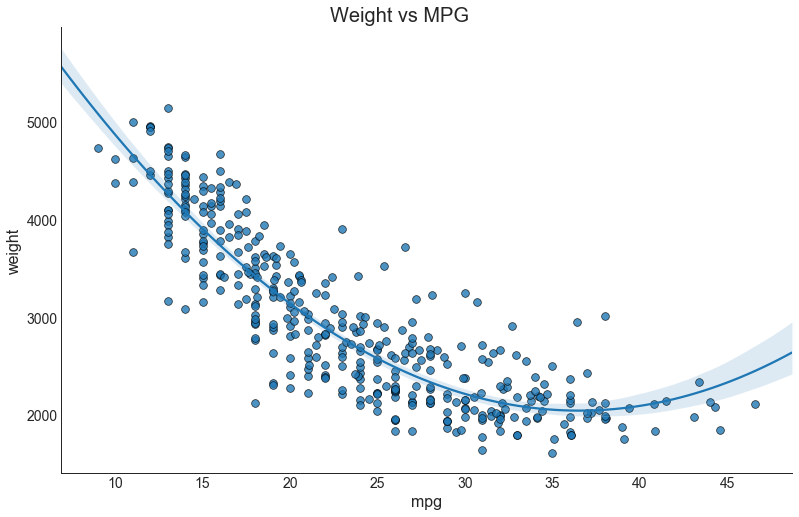

In [41]:
sns.lmplot(x="mpg", y="weight", data=df, order=2,height=7, aspect=1.6, palette='tab10',
           scatter_kws=dict(s=60, linewidths=.7, edgecolors='black')).fig.suptitle("Weight vs MPG", y=1.02, fontsize= large);

# Histogram

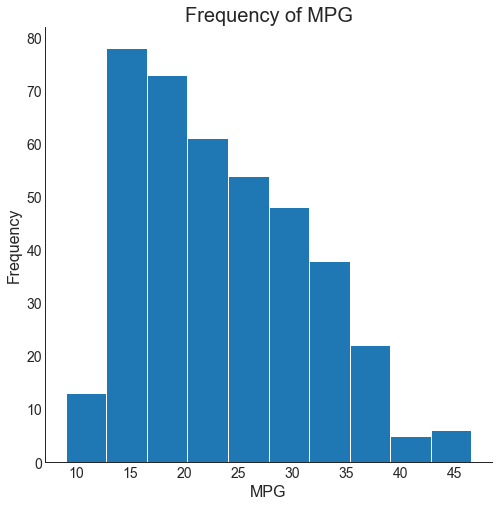

In [42]:
plt.hist(df.mpg)
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title("Frequency of MPG", fontsize=large)
sns.despine() #despine removes chart junk

# Boxplot

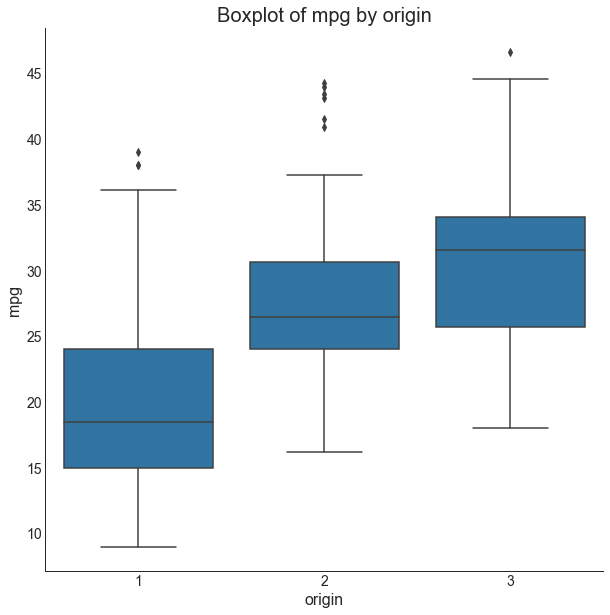

In [43]:
df = pd.read_csv('auto-mpg.csv')
var = 'origin'
data_plt = pd.concat([df['mpg'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.boxplot(x=var, y="mpg", data=df, color='tab:blue')
sns.despine()
plt.title('Boxplot of mpg by origin', fontsize=large);

# Violin Plot

C:\Users\Sameer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


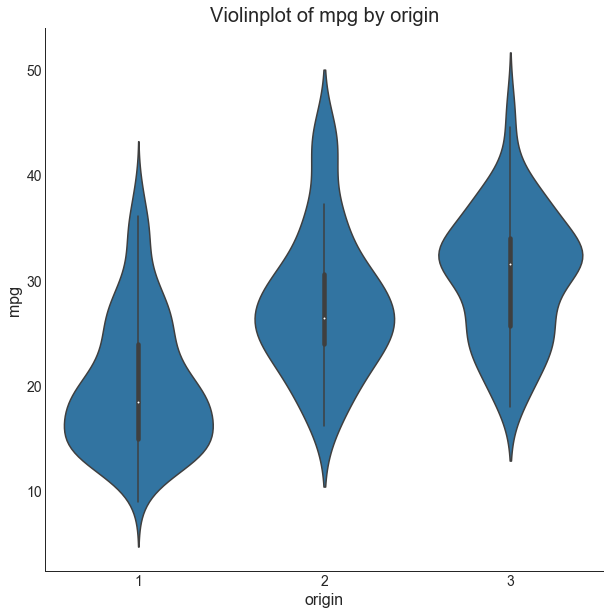

In [44]:
var = 'origin'
data_plt = pd.concat([df['mpg'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 10))
fig = sns.violinplot(x=var, y="mpg", data=df, color='tab:blue')
sns.despine()
plt.title('Violinplot of mpg by origin',fontsize=large);

# Scatterplot

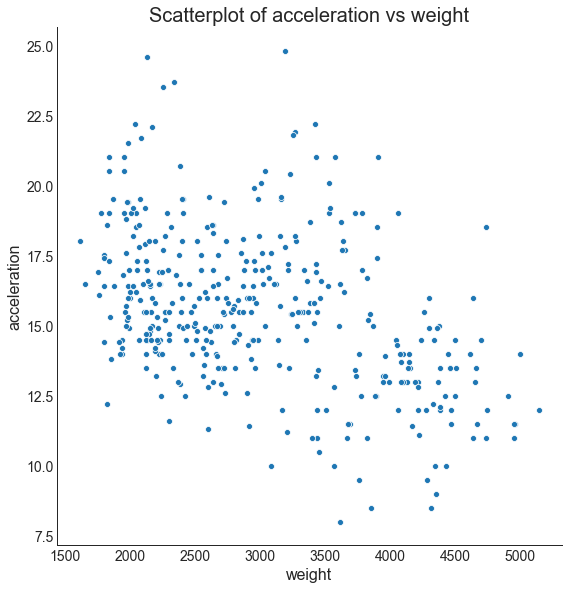

In [45]:
sns.scatterplot(x=df["weight"], y=df["acceleration"])
plt.tight_layout()
plt.title('Scatterplot of acceleration vs weight', fontsize = large);
sns.despine()

# Density Plot

C:\Users\Sameer\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Sameer\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


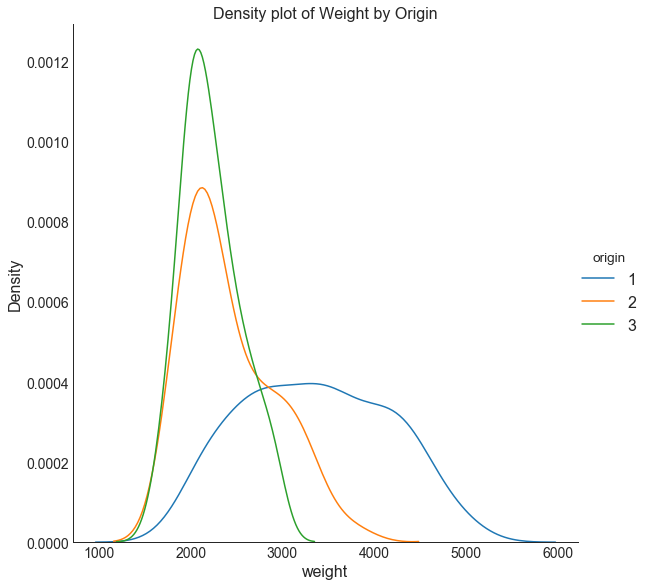

In [46]:
sns.FacetGrid(
    df, hue="origin", size=8) \
   .map(sns.kdeplot, "weight") \
   .add_legend()
plt.title('Density plot of Weight by Origin');
plt.ylabel('Density');

# Stacked Bar Graph

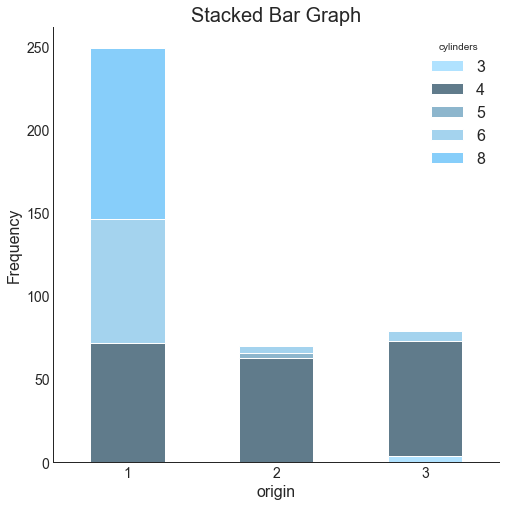

In [47]:
colors = ["#B0E2FF", "#607B8B","#8DB6CD",'#A4D3EE','#87CEFA']
(df.groupby(['origin', 'cylinders'])
 .size()
 .unstack()
 .plot.bar(stacked=True, color = colors))
plt.xticks(rotation=360)
sns.despine()
plt.ylabel('Frequency')
plt.title('Stacked Bar Graph', fontsize=large);


# Horizontal Bar Plot

In [48]:
top5=df.loc[:,['name','horsepower','weight']].sort_values('horsepower', ascending = False)[:5]

In [49]:
top5.sort_values('weight',ascending=False, inplace=True)

In [50]:
top5=top5['name']

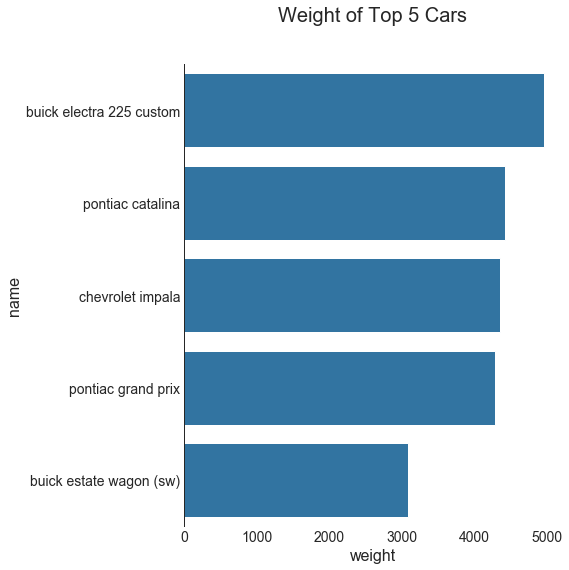

In [51]:
fig, ax = plt.subplots(figsize=(8,8))
ax = fig.gca()
sns.despine(bottom=True)
sns.barplot(y= top5, x='weight', data=df, color = 'tab:blue', ax=ax)
ax.set_title('Weight of Top 5 Cars', size=large, y=1.08);
plt.tight_layout()

# Treemap

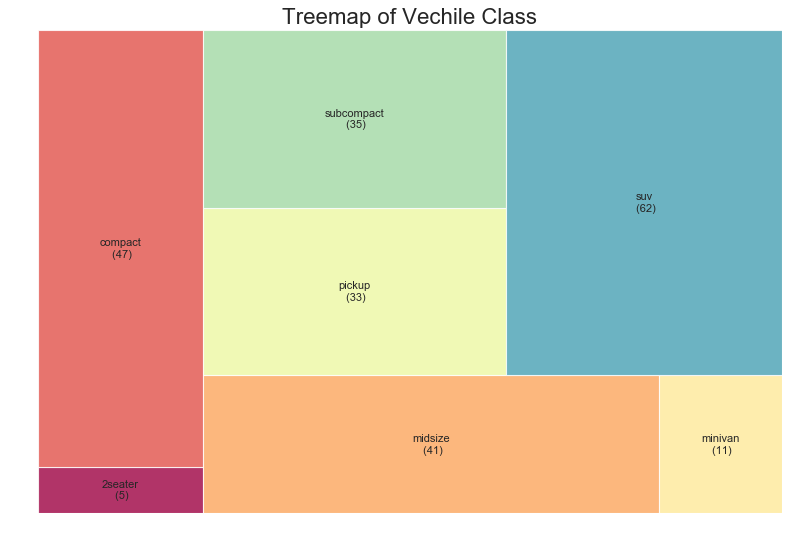

In [52]:
import squarify 

# Import Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Vechile Class', fontsize = large)
plt.axis('off')
plt.show()